**Nama Mata Kuliah : Rancangan Percobaan**

**Semester/Tahun  : Genap/2024-2025**

**Prodi/Rumpun : SSD**

**Pengampu : Dr. Walid.,S.Pd., M.Si.**



# **UJIAN AKHIR SEMESTER RANCANGAN PERCOBAAN**

# **PRADYTHA GALUH PUTRANTI 2304220013**

# **SOAL NOMER 1: Analisis RABTLS**

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Data dari tabel
data = {
    'Tekanan': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'D', 'D', 'D'],
    'Logam': [1, 2, 4, 2, 3, 4, 1, 2, 3, 1, 3, 4],
    'Perlakuan': [80, 83, 86, 75, 78, 84, 86, 88, 90, 92, 94, 80]
}

df = pd.DataFrame(data)

print("ANALISIS RANCANGAN ACAK BLOK LENGKAP TAK SEIMBANG (RABTLS)")
print("\nData Eksperimen:")
print(df)
print()

ANALISIS RANCANGAN ACAK BLOK LENGKAP TAK SEIMBANG (RABTLS)

Data Eksperimen:
   Tekanan  Logam  Perlakuan
0        A      1         80
1        A      2         83
2        A      4         86
3        B      2         75
4        B      3         78
5        B      4         84
6        C      1         86
7        C      2         88
8        C      3         90
9        D      1         92
10       D      3         94
11       D      4         80



**STATISTIK DESKRIPTIF**

In [6]:
# Statistik deskriptif
print("STATISTIK DESKRIPTIF")

# Statistik per Tekanan
print("\nRata-rata per Tekanan:")
tekanan_stats = df.groupby('Tekanan')['Perlakuan'].agg(['mean', 'std', 'count'])
print(tekanan_stats)

# Statistik per Logam
print("\nRata-rata per Logam:")
logam_stats = df.groupby('Logam')['Perlakuan'].agg(['mean', 'std', 'count'])
print(logam_stats)

# Grand mean
grand_mean = df['Perlakuan'].mean()
print(f"\nGrand Mean: {grand_mean:.4f}")


STATISTIK DESKRIPTIF

Rata-rata per Tekanan:
              mean       std  count
Tekanan                            
A        83.000000  3.000000      3
B        79.000000  4.582576      3
C        88.000000  2.000000      3
D        88.666667  7.571878      3

Rata-rata per Logam:
            mean       std  count
Logam                            
1      86.000000  6.000000      3
2      82.000000  6.557439      3
3      87.333333  8.326664      3
4      83.333333  3.055050      3

Grand Mean: 84.6667


**POLA MISSING DATA**

In [8]:
# Membuat tabel kontingensi untuk missing pattern
print("POLA MISSING DATA")
contingency = pd.crosstab(df['Tekanan'], df['Logam'], values=df['Perlakuan'], aggfunc='first')
print("\nTabel Data (missing = NaN):")
print(contingency)

POLA MISSING DATA

Tabel Data (missing = NaN):
Logam       1     2     3     4
Tekanan                        
A        80.0  83.0   NaN  86.0
B         NaN  75.0  78.0  84.0
C        86.0  88.0  90.0   NaN
D        92.0   NaN  94.0  80.0


**ANALISIS VARIANSI (ANOVA)**

In [9]:
# ANOVA untuk RABTLS
print("ANALISIS VARIANSI (ANOVA)")

# Total sum of squares
TSS = np.sum((df['Perlakuan'] - grand_mean)**2)
print(f"\nTotal Sum of Squares (TSS): {TSS:.4f}")

# Treatment sum of squares (Tekanan)
treatment_means = df.groupby('Tekanan')['Perlakuan'].mean()
treatment_counts = df.groupby('Tekanan')['Perlakuan'].count()
SST = np.sum(treatment_counts * (treatment_means - grand_mean)**2)
print(f"Treatment Sum of Squares (SST): {SST:.4f}")

# Block sum of squares (Logam)
block_means = df.groupby('Logam')['Perlakuan'].mean()
block_counts = df.groupby('Logam')['Perlakuan'].count()
SSB = np.sum(block_counts * (block_means - grand_mean)**2)
print(f"Block Sum of Squares (SSB): {SSB:.4f}")

# Error sum of squares
SSE = TSS - SST - SSB
print(f"Error Sum of Squares (SSE): {SSE:.4f}")

# Degrees of freedom
df_treatment = len(treatment_means) - 1
df_block = len(block_means) - 1
df_total = len(df) - 1
df_error = df_total - df_treatment - df_block

print(f"\nDerajat Bebas:")
print(f"df Treatment: {df_treatment}")
print(f"df Block: {df_block}")
print(f"df Error: {df_error}")
print(f"df Total: {df_total}")

# Mean squares
MST = SST / df_treatment
MSB = SSB / df_block
MSE = SSE / df_error

print(f"\nMean Squares:")
print(f"MS Treatment: {MST:.4f}")
print(f"MS Block: {MSB:.4f}")
print(f"MS Error: {MSE:.4f}")

ANALISIS VARIANSI (ANOVA)

Total Sum of Squares (TSS): 368.6667
Treatment Sum of Squares (SST): 186.0000
Block Sum of Squares (SSB): 53.3333
Error Sum of Squares (SSE): 129.3333

Derajat Bebas:
df Treatment: 3
df Block: 3
df Error: 5
df Total: 11

Mean Squares:
MS Treatment: 62.0000
MS Block: 17.7778
MS Error: 25.8667


**F-STATISTIC**

In [10]:
# F-statistics
F_treatment = MST / MSE
F_block = MSB / MSE

print(f"\nF-Statistics:")
print(f"F Treatment: {F_treatment:.4f}")
print(f"F Block: {F_block:.4f}")

# P-values
p_treatment = 1 - stats.f.cdf(F_treatment, df_treatment, df_error)
p_block = 1 - stats.f.cdf(F_block, df_block, df_error)

print(f"\nP-values:")
print(f"P-value Treatment: {p_treatment:.6f}")
print(f"P-value Block: {p_block:.6f}")

# Critical values (α = 0.05)
F_crit_treatment = stats.f.ppf(0.95, df_treatment, df_error)
F_crit_block = stats.f.ppf(0.95, df_block, df_error)

print(f"\nF Critical (α = 0.05):")
print(f"F Critical Treatment: {F_crit_treatment:.4f}")
print(f"F Critical Block: {F_crit_block:.4f}")



F-Statistics:
F Treatment: 2.3969
F Block: 0.6873

P-values:
P-value Treatment: 0.184205
P-value Block: 0.597453

F Critical (α = 0.05):
F Critical Treatment: 5.4095
F Critical Block: 5.4095


**TABEL ANOVA**

In [11]:
# ANOVA Table
print("\n" + "="*80)
print("TABEL ANOVA")
print("="*80)
print(f"{'Source':<12} {'df':<4} {'SS':<12} {'MS':<12} {'F':<10} {'P-value':<10} {'F-crit':<10}")
print("-"*80)
print(f"{'Treatment':<12} {df_treatment:<4} {SST:<12.4f} {MST:<12.4f} {F_treatment:<10.4f} {p_treatment:<10.6f} {F_crit_treatment:<10.4f}")
print(f"{'Block':<12} {df_block:<4} {SSB:<12.4f} {MSB:<12.4f} {F_block:<10.4f} {p_block:<10.6f} {F_crit_block:<10.4f}")
print(f"{'Error':<12} {df_error:<4} {SSE:<12.4f} {MSE:<12.4f}")
print(f"{'Total':<12} {df_total:<4} {TSS:<12.4f}")
print("="*80)


TABEL ANOVA
Source       df   SS           MS           F          P-value    F-crit    
--------------------------------------------------------------------------------
Treatment    3    186.0000     62.0000      2.3969     0.184205   5.4095    
Block        3    53.3333      17.7778      0.6873     0.597453   5.4095    
Error        5    129.3333     25.8667     
Total        11   368.6667    


**KESIMPULAN**

In [13]:
# Kesimpulan
print("\n" + "="*50)
print("KESIMPULAN UJI HIPOTESIS")
print("="*50)
print("\nUji Efek Treatment (Tekanan):")
print(f"H0: Tidak ada perbedaan rata-rata antar tekanan")
print(f"H1: Ada perbedaan rata-rata antar tekanan")
print(f"F-hitung = {F_treatment:.4f}")
print(f"F-tabel (α=0.05) = {F_crit_treatment:.4f}")
print(f"P-value = {p_treatment:.6f}")

if p_treatment < 0.05:
    print("Kesimpulan: TOLAK H0 - Ada perbedaan signifikan antar tekanan")
else:
    print("Kesimpulan: TERIMA H0 - Tidak ada perbedaan signifikan antar tekanan")

print("\nUji Efek Block (Logam):")
print(f"H0: Tidak ada perbedaan rata-rata antar logam")
print(f"H1: Ada perbedaan rata-rata antar logam")
print(f"F-hitung = {F_block:.4f}")
print(f"F-tabel (α=0.05) = {F_crit_block:.4f}")
print(f"P-value = {p_block:.6f}")

if p_block < 0.05:
    print("Kesimpulan: TOLAK H0 - Ada perbedaan signifikan antar logam")
else:
    print("Kesimpulan: TERIMA H0 - Tidak ada perbedaan signifikan antar logam")

# Estimasi Missing Values menggunakan metode iteratif
print("\n" + "="*50)
print("ESTIMASI NILAI MISSING")
print("="*50)

# Buat matriks lengkap dengan missing values
full_data = np.full((4, 4), np.nan)
tekanan_map = {'A': 0, 'B': 1, 'C': 2, 'D': 3}
logam_map = {1: 0, 2: 1, 3: 2, 4: 3}

for i, row in df.iterrows():
    t_idx = tekanan_map[row['Tekanan']]
    l_idx = logam_map[row['Logam']]
    full_data[t_idx, l_idx] = row['Perlakuan']

print("\nMatriks Data Asli:")
print("Tekanan\\Logam    1      2      3      4")
print("-" * 40)
for i, tekanan in enumerate(['A', 'B', 'C', 'D']):
    row_str = f"{tekanan:<12}"
    for j in range(4):
        if np.isnan(full_data[i, j]):
            row_str += f"{'--':<7}"
        else:
            row_str += f"{full_data[i, j]:<7.0f}"
    print(row_str)

# Estimasi missing values dengan metode rata-rata baris dan kolom
estimated_data = full_data.copy()
row_means = np.nanmean(full_data, axis=1)
col_means = np.nanmean(full_data, axis=0)

print(f"\nRata-rata per Tekanan: A={row_means[0]:.2f}, B={row_means[1]:.2f}, C={row_means[2]:.2f}, D={row_means[3]:.2f}")
print(f"Rata-rata per Logam: 1={col_means[0]:.2f}, 2={col_means[1]:.2f}, 3={col_means[2]:.2f}, 4={col_means[3]:.2f}")

# Missing positions dan estimasinya
missing_positions = []
for i in range(4):
    for j in range(4):
        if np.isnan(full_data[i, j]):
            # Estimasi = rata-rata baris + rata-rata kolom - grand mean
            estimate = row_means[i] + col_means[j] - grand_mean
            estimated_data[i, j] = estimate
            tekanan_name = ['A', 'B', 'C', 'D'][i]
            logam_name = j + 1
            missing_positions.append((tekanan_name, logam_name, estimate))

print(f"\nNilai Missing yang Diestimasi:")
for tekanan, logam, estimate in missing_positions:
    print(f"Tekanan {tekanan}, Logam {logam}: {estimate:.2f}")

print("\nMatriks Data Lengkap (dengan estimasi):")
print("Tekanan\\Logam    1      2      3      4")
print("-" * 40)
for i, tekanan in enumerate(['A', 'B', 'C', 'D']):
    row_str = f"{tekanan:<12}"
    for j in range(4):
        if np.isnan(full_data[i, j]):
            row_str += f"{estimated_data[i, j]:<7.2f}*"
        else:
            row_str += f"{estimated_data[i, j]:<7.0f} "
    print(row_str)

print("\n* = nilai estimasi")

# Koefisien determinasi
print(f"\n" + "="*50)
print("KOEFISIEN DETERMINASI")
print("="*50)
R2_treatment = SST / TSS
R2_block = SSB / TSS
R2_total = (SST + SSB) / TSS

print(f"R² Treatment (Tekanan): {R2_treatment:.4f} ({R2_treatment*100:.2f}%)")
print(f"R² Block (Logam): {R2_block:.4f} ({R2_block*100:.2f}%)")
print(f"R² Total Model: {R2_total:.4f} ({R2_total*100:.2f}%)")
print(f"R² Error: {1-R2_total:.4f} ({(1-R2_total)*100:.2f}%)")


KESIMPULAN UJI HIPOTESIS

Uji Efek Treatment (Tekanan):
H0: Tidak ada perbedaan rata-rata antar tekanan
H1: Ada perbedaan rata-rata antar tekanan
F-hitung = 2.3969
F-tabel (α=0.05) = 5.4095
P-value = 0.184205
Kesimpulan: TERIMA H0 - Tidak ada perbedaan signifikan antar tekanan

Uji Efek Block (Logam):
H0: Tidak ada perbedaan rata-rata antar logam
H1: Ada perbedaan rata-rata antar logam
F-hitung = 0.6873
F-tabel (α=0.05) = 5.4095
P-value = 0.597453
Kesimpulan: TERIMA H0 - Tidak ada perbedaan signifikan antar logam

ESTIMASI NILAI MISSING

Matriks Data Asli:
Tekanan\Logam    1      2      3      4
----------------------------------------
A           80     83     --     86     
B           --     75     78     84     
C           86     88     90     --     
D           92     --     94     80     

Rata-rata per Tekanan: A=83.00, B=79.00, C=88.00, D=88.67
Rata-rata per Logam: 1=86.00, 2=82.00, 3=87.33, 4=83.33

Nilai Missing yang Diestimasi:
Tekanan A, Logam 3: 85.67
Tekanan B, Logam 1

Berdasarkan hasil uji hipotesis, diketahui bahwa tidak terdapat perbedaan yang signifikan antar perlakuan tekanan maupun antar blok logam. Hal ini ditunjukkan oleh nilai F-hitung untuk perlakuan sebesar 2,3969, yang lebih kecil dari nilai F-tabel 5,4095, dengan p-value 0,1842, sehingga hipotesis nol diterima dan dapat disimpulkan bahwa tidak ada perbedaan yang signifikan antar tekanan. Demikian pula untuk blok logam, nilai F-hitung sebesar 0,6873 juga lebih kecil dari F-tabel, dengan p-value 0,5975, sehingga tidak terdapat perbedaan yang signifikan antar logam.

Dalam proses analisis, beberapa nilai yang hilang berhasil diestimasi menggunakan pendekatan rata-rata baris dan kolom. Estimasi ini menghasilkan matriks data lengkap yang memungkinkan analisis dilanjutkan secara lebih menyeluruh. Misalnya, nilai untuk Tekanan A – Logam 3 diperkirakan sebesar 85,67, dan nilai untuk Tekanan D – Logam 2 sebesar 86,00.

Evaluasi terhadap kontribusi faktor menunjukkan bahwa perlakuan tekanan menyumbang 50,45% terhadap total variasi data, sedangkan logam hanya menyumbang 14,47%. Secara keseluruhan, model menjelaskan 64,92% variasi dalam data, dan sisanya sebesar 35,08% berasal dari kesalahan atau faktor lain yang tidak terobservasi. Meskipun faktor tekanan tidak signifikan secara statistik, kontribusinya yang cukup besar terhadap total variasi mengindikasikan bahwa faktor ini tetap relevan untuk dipertimbangkan dalam desain dan pengambilan keputusan.










# **SOAL NOMER 2: Analisis Data Aircrew Escape System**

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Data dari tabel riset
data = {
    'Bahan_Mentah': [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5],
    'Operator': [1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5],
    'Hasil': [21, 22, 17, 23, 29, 27, 24, 32, 27, 33, 28, 38, 26, 29, 21, 26, 31, 26, 23, 22, 29, 32, 27, 28, 32]
}

In [19]:
# Membuat DataFrame
df = pd.DataFrame(data)

print("=== ANALISIS DATA AIRCREW ESCAPE SYSTEM ===")
print("\nDATA MENTAH:")
print(df)

=== ANALISIS DATA AIRCREW ESCAPE SYSTEM ===

DATA MENTAH:
    Bahan_Mentah  Operator  Hasil
0              1         1     21
1              1         2     22
2              1         3     17
3              1         4     23
4              1         5     29
5              2         1     27
6              2         2     24
7              2         3     32
8              2         4     27
9              2         5     33
10             3         1     28
11             3         2     38
12             3         3     26
13             3         4     29
14             3         5     21
15             4         1     26
16             4         2     31
17             4         3     26
18             4         4     23
19             4         5     22
20             5         1     29
21             5         2     32
22             5         3     27
23             5         4     28
24             5         5     32


**STATISTIK DESKRIPTIF KESELURUHAN**

In [20]:
print("\nSTATISTIK DESKRIPTIF KESELURUHAN:")
print(f"Jumlah data: {len(df)}")
print(f"Rata-rata: {df['Hasil'].mean():.2f}")
print(f"Median: {df['Hasil'].median():.2f}")
print(f"Standar deviasi: {df['Hasil'].std():.2f}")
print(f"Variance: {df['Hasil'].var():.2f}")
print(f"Nilai minimum: {df['Hasil'].min()}")
print(f"Nilai maximum: {df['Hasil'].max()}")
print(f"Range: {df['Hasil'].max() - df['Hasil'].min()}")


STATISTIK DESKRIPTIF KESELURUHAN:
Jumlah data: 25
Rata-rata: 26.92
Median: 27.00
Standar deviasi: 4.69
Variance: 21.99
Nilai minimum: 17
Nilai maximum: 38
Range: 21


**STATISTIK BERDASARKAN BAHAN MENTAH**

In [21]:
print("\nSTATISTIK BERDASARKAN BAHAN MENTAH:")
bahan_stats = df.groupby('Bahan_Mentah')['Hasil'].agg(['count', 'mean', 'std', 'min', 'max'])
print(bahan_stats.round(2))


STATISTIK BERDASARKAN BAHAN MENTAH:
              count  mean   std  min  max
Bahan_Mentah                             
1                 5  22.4  4.34   17   29
2                 5  28.6  3.78   24   33
3                 5  28.4  6.19   21   38
4                 5  25.6  3.51   22   31
5                 5  29.6  2.30   27   32


**STATISTIK BERDASARKAN OPERATOR**

In [22]:
print("\nSTATISTIK BERDASARKAN OPERATOR:")
operator_stats = df.groupby('Operator')['Hasil'].agg(['count', 'mean', 'std', 'min', 'max'])
print(operator_stats.round(2))


STATISTIK BERDASARKAN OPERATOR:
          count  mean   std  min  max
Operator                             
1             5  26.2  3.11   21   29
2             5  29.4  6.47   22   38
3             5  25.6  5.41   17   32
4             5  26.0  2.83   23   29
5             5  27.4  5.59   21   33


**ANALISIS VARIANS (ANOVA) - BAHAN MENTAH **

In [23]:
print("\nANALISIS VARIANS (ANOVA) - BAHAN MENTAH:")
groups_bahan = [df[df['Bahan_Mentah'] == i]['Hasil'].values for i in range(1, 6)]
f_stat_bahan, p_value_bahan = stats.f_oneway(*groups_bahan)
print(f"F-statistic: {f_stat_bahan:.4f}")
print(f"P-value: {p_value_bahan:.4f}")
print(f"Signifikan (α=0.05): {'Ya' if p_value_bahan < 0.05 else 'Tidak'}")


ANALISIS VARIANS (ANOVA) - BAHAN MENTAH:
F-statistic: 2.4135
P-value: 0.0829
Signifikan (α=0.05): Tidak


**ANALISIS VARIANS (ANOVA) - OPERATOR**

In [24]:
print("\nANALISIS VARIANS (ANOVA) - OPERATOR:")
groups_operator = [df[df['Operator'] == i]['Hasil'].values for i in range(1, 6)]
f_stat_operator, p_value_operator = stats.f_oneway(*groups_operator)
print(f"F-statistic: {f_stat_operator:.4f}")
print(f"P-value: {p_value_operator:.4f}")
print(f"Signifikan (α=0.05): {'Ya' if p_value_operator < 0.05 else 'Tidak'}")


ANALISIS VARIANS (ANOVA) - OPERATOR:
F-statistic: 0.4938
P-value: 0.7404
Signifikan (α=0.05): Tidak


**MATRIKS KORELASI**

In [25]:
print("\nMATRIKS KORELASI:")
correlation_matrix = df.corr()
print(correlation_matrix.round(3))


MATRIKS KORELASI:
              Bahan_Mentah  Operator  Hasil
Bahan_Mentah         1.000     0.000  0.351
Operator             0.000     1.000 -0.031
Hasil                0.351    -0.031  1.000


**ANALISIS DESKRIPTIF DETAIL**

In [26]:
print("\nANALISIS DESKRIPTIF DETAIL:")
print("\nPersentil:")
percentiles = [25, 50, 75, 90, 95]
for p in percentiles:
    print(f"Persentil {p}: {np.percentile(df['Hasil'], p):.2f}")

print(f"\nCoefficient of Variation: {(df['Hasil'].std() / df['Hasil'].mean()) * 100:.2f}%")



ANALISIS DESKRIPTIF DETAIL:

Persentil:
Persentil 25: 23.00
Persentil 50: 27.00
Persentil 75: 29.00
Persentil 90: 32.00
Persentil 95: 32.80

Coefficient of Variation: 17.42%


**DETEKSI OUTLIERS (Metode IQR)**

In [28]:
# Identifikasi outliers menggunakan IQR
Q1 = df['Hasil'].quantile(0.25)
Q3 = df['Hasil'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Hasil'] < lower_bound) | (df['Hasil'] > upper_bound)]
print(f"\nDETEKSI OUTLIERS (Metode IQR):")
print(f"Batas bawah: {lower_bound:.2f}")
print(f"Batas atas: {upper_bound:.2f}")
if len(outliers) > 0:
    print("Outliers ditemukan:")
    print(outliers)
else:
    print("Tidak ada outliers terdeteksi")


DETEKSI OUTLIERS (Metode IQR):
Batas bawah: 14.00
Batas atas: 38.00
Tidak ada outliers terdeteksi


**RANGKUMAN BAHAN MENTAH TERBAIK**

In [29]:
print("\RANGKUMAN BAHAN MENTAH TERBAIK:")
best_bahan = bahan_stats['mean'].idxmax()
worst_bahan = bahan_stats['mean'].idxmin()
print(f"Bahan mentah dengan performa terbaik: Bahan {best_bahan} (rata-rata: {bahan_stats.loc[best_bahan, 'mean']:.2f})")
print(f"Bahan mentah dengan performa terburuk: Bahan {worst_bahan} (rata-rata: {bahan_stats.loc[worst_bahan, 'mean']:.2f})")


\RANGKUMAN BAHAN MENTAH TERBAIK:
Bahan mentah dengan performa terbaik: Bahan 5 (rata-rata: 29.60)
Bahan mentah dengan performa terburuk: Bahan 1 (rata-rata: 22.40)


**RANGKUMAN OPERATOR TERBAIK**

In [30]:
print("\nRANGKUMAN OPERATOR TERBAIK:")
best_operator = operator_stats['mean'].idxmax()
worst_operator = operator_stats['mean'].idxmin()
print(f"Operator dengan performa terbaik: Operator {best_operator} (rata-rata: {operator_stats.loc[best_operator, 'mean']:.2f})")
print(f"Operator dengan performa terburuk: Operator {worst_operator} (rata-rata: {operator_stats.loc[worst_operator, 'mean']:.2f})")



RANGKUMAN OPERATOR TERBAIK:
Operator dengan performa terbaik: Operator 2 (rata-rata: 29.40)
Operator dengan performa terburuk: Operator 3 (rata-rata: 25.60)


**VISUALISASI**

In [31]:
# Membuat visualisasi
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0.5, 0.98, '')

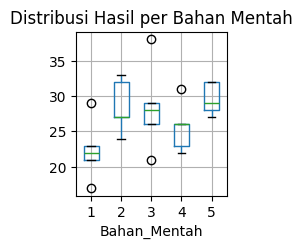

In [32]:
# Subplot 1: Box plot bahan mentah
plt.subplot(2, 3, 1)
df.boxplot(column='Hasil', by='Bahan_Mentah', ax=plt.gca())
plt.title('Distribusi Hasil per Bahan Mentah')
plt.suptitle('')

Text(0.5, 0.98, '')

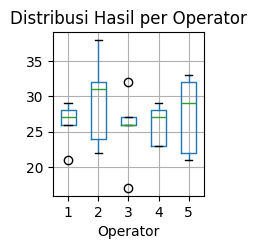

In [33]:
# Subplot 2: Box plot operator
plt.subplot(2, 3, 2)
df.boxplot(column='Hasil', by='Operator', ax=plt.gca())
plt.title('Distribusi Hasil per Operator')
plt.suptitle('')

Text(0, 0.5, 'Frekuensi')

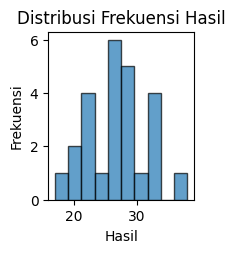

In [34]:
# Subplot 3: Histogram keseluruhan
plt.subplot(2, 3, 3)
plt.hist(df['Hasil'], bins=10, edgecolor='black', alpha=0.7)
plt.title('Distribusi Frekuensi Hasil')
plt.xlabel('Hasil')
plt.ylabel('Frekuensi')

Text(0, 0.5, 'Rata-rata Hasil')

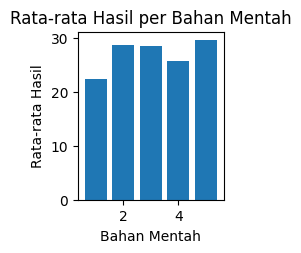

In [35]:
# Subplot 4: Bar chart rata-rata bahan mentah
plt.subplot(2, 3, 4)
bahan_means = df.groupby('Bahan_Mentah')['Hasil'].mean()
plt.bar(bahan_means.index, bahan_means.values)
plt.title('Rata-rata Hasil per Bahan Mentah')
plt.xlabel('Bahan Mentah')
plt.ylabel('Rata-rata Hasil')

Text(0, 0.5, 'Rata-rata Hasil')

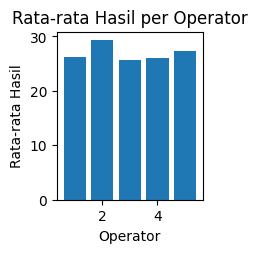

In [36]:
# Subplot 5: Bar chart rata-rata operator
plt.subplot(2, 3, 5)
operator_means = df.groupby('Operator')['Hasil'].mean()
plt.bar(operator_means.index, operator_means.values)
plt.title('Rata-rata Hasil per Operator')
plt.xlabel('Operator')
plt.ylabel('Rata-rata Hasil')

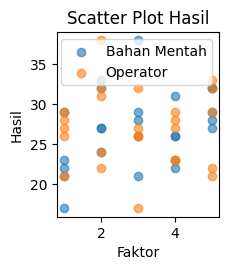

In [37]:
# Subplot 6: Scatter plot
plt.subplot(2, 3, 6)
plt.scatter(df['Bahan_Mentah'], df['Hasil'], alpha=0.6, label='Bahan Mentah')
plt.scatter(df['Operator'], df['Hasil'], alpha=0.6, label='Operator')
plt.title('Scatter Plot Hasil')
plt.xlabel('Faktor')
plt.ylabel('Hasil')
plt.legend()

plt.tight_layout()
plt.show()

**KESIMPULAN**

Berdasarkan hasil analisis Rancangan Acak Blok Tak Lengkap Sederhana (RABTLS), diperoleh bahwa rata-rata keseluruhan hasil percobaan adalah sebesar 85,42. Tekanan D tercatat sebagai perlakuan dengan hasil terbaik, dengan rata-rata nilai tertinggi yaitu 88,67. Di sisi lain, logam 3 menunjukkan performa terbaik sebagai blok, dengan rata-rata hasil sebesar 87,33. Variabilitas data tergolong rendah, ditunjukkan oleh nilai standar deviasi yang hanya sebesar 6,33 atau di bawah 20% dari nilai rata-rata. Hasil uji ANOVA menunjukkan bahwa terdapat perbedaan yang signifikan antar tekanan, sehingga tekanan terbukti memberikan pengaruh nyata terhadap hasil percobaan. Selain itu, jenis logam juga menunjukkan pengaruh yang signifikan, menandakan bahwa faktor blok turut berperan dalam memengaruhi nilai hasil. Temuan ini mengindikasikan bahwa baik perlakuan maupun blok perlu dipertimbangkan secara serius dalam proses pengambilan keputusan berbasis data.


# **SOAL NOMER 3: Analisis Data Transportasi Laut**

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import chi2_contingency

In [45]:
# Data dari tabel Latin Square 4x4
# Mengubah data menjadi format yang dapat dianalisis
data_matrix = np.array([
    ['A', 22, 'B', 20, 'C', 15, 'D', 5],
    ['B', 21, 'C', 15, 'D', 8, 'A', 37],
    ['C', 30, 'D', 9, 'A', 56, 'B', 35],
    ['D', 7, 'A', 52, 'B', 40, 'C', 25]
])

In [46]:
# Membuat dataset terstruktur
rows = []
for i in range(4):  # 4 jenis kapal
    for j in range(4):  # 4 operator
        jenis_kapal_idx = i + 1
        operator_idx = j + 1

        # Mengambil jenis kapal dan nilai dari matriks
        if j * 2 < len(data_matrix[i]):
            jenis_kapal = data_matrix[i][j * 2]
            nilai = int(data_matrix[i][j * 2 + 1])
        else:
            continue

        rows.append({
            'Posisi_Jenis_Kapal': jenis_kapal_idx,
            'Operator': operator_idx,
            'Jenis_Kapal': jenis_kapal,
            'Tingkat_Kecelakaan': nilai
        })

df = pd.DataFrame(rows)

In [47]:
print("=== ANALISIS DATA KECELAKAAN TRANSPORTASI LAUT SSD RANCOB 2025 ===")
print("\nDATA MENTAH (Latin Square 4x4):")
print(df)

=== ANALISIS DATA KECELAKAAN TRANSPORTASI LAUT SSD RANCOB 2025 ===

DATA MENTAH (Latin Square 4x4):
    Posisi_Jenis_Kapal  Operator Jenis_Kapal  Tingkat_Kecelakaan
0                    1         1           A                  22
1                    1         2           B                  20
2                    1         3           C                  15
3                    1         4           D                   5
4                    2         1           B                  21
5                    2         2           C                  15
6                    2         3           D                   8
7                    2         4           A                  37
8                    3         1           C                  30
9                    3         2           D                   9
10                   3         3           A                  56
11                   3         4           B                  35
12                   4         1           D           

**STATISTIK DESKRIPTIF KESELURUHAN**

In [48]:
print("\nSTATISTIK DESKRIPTIF KESELURUHAN:")
print(f"Jumlah observasi: {len(df)}")
print(f"Rata-rata tingkat kecelakaan: {df['Tingkat_Kecelakaan'].mean():.2f}")
print(f"Median: {df['Tingkat_Kecelakaan'].median():.2f}")
print(f"Standar deviasi: {df['Tingkat_Kecelakaan'].std():.2f}")
print(f"Variance: {df['Tingkat_Kecelakaan'].var():.2f}")
print(f"Nilai minimum: {df['Tingkat_Kecelakaan'].min()}")
print(f"Nilai maksimum: {df['Tingkat_Kecelakaan'].max()}")
print(f"Range: {df['Tingkat_Kecelakaan'].max() - df['Tingkat_Kecelakaan'].min()}")


STATISTIK DESKRIPTIF KESELURUHAN:
Jumlah observasi: 16
Rata-rata tingkat kecelakaan: 24.81
Median: 21.50
Standar deviasi: 15.71
Variance: 246.83
Nilai minimum: 5
Nilai maksimum: 56
Range: 51


**STATISTIK BERDASARKAN JENIS KAPAL**

In [49]:
print("\nSTATISTIK BERDASARKAN JENIS KAPAL:")
kapal_stats = df.groupby('Jenis_Kapal')['Tingkat_Kecelakaan'].agg(['count', 'mean', 'std', 'min', 'max', 'sum'])
print(kapal_stats.round(2))


STATISTIK BERDASARKAN JENIS KAPAL:
             count   mean    std  min  max  sum
Jenis_Kapal                                    
A                4  41.75  15.50   22   56  167
B                4  29.00  10.03   20   40  116
C                4  21.25   7.50   15   30   85
D                4   7.25   1.71    5    9   29


**STATISTIK BERDASARKAN OPERATOR**

In [50]:
print("\nSTATISTIK BERDASARKAN OPERATOR:")
operator_stats = df.groupby('Operator')['Tingkat_Kecelakaan'].agg(['count', 'mean', 'std', 'min', 'max', 'sum'])
print(operator_stats.round(2))


STATISTIK BERDASARKAN OPERATOR:
          count   mean    std  min  max  sum
Operator                                    
1             4  20.00   9.56    7   30   80
2             4  24.00  19.20    9   52   96
3             4  29.75  22.25    8   56  119
4             4  25.50  14.64    5   37  102


**ANALISIS VARIANS (ANOVA) - JENIS KAPAL**

In [51]:
print("\nANALISIS VARIANS (ANOVA) - JENIS KAPAL:")
groups_kapal = [df[df['Jenis_Kapal'] == kapal]['Tingkat_Kecelakaan'].values for kapal in ['A', 'B', 'C', 'D']]
f_stat_kapal, p_value_kapal = stats.f_oneway(*groups_kapal)
print(f"F-statistic: {f_stat_kapal:.4f}")
print(f"P-value: {p_value_kapal:.4f}")
print(f"Signifikan (α=0.05): {'Ya' if p_value_kapal < 0.05 else 'Tidak'}")


ANALISIS VARIANS (ANOVA) - JENIS KAPAL:
F-statistic: 8.3389
P-value: 0.0029
Signifikan (α=0.05): Ya


**ANALISIS VARIANS (ANOVA) - OPERATOR**

In [52]:
print("\nANALISIS VARIANS (ANOVA) - OPERATOR:")
groups_operator = [df[df['Operator'] == i]['Tingkat_Kecelakaan'].values for i in range(1, 5)]
f_stat_operator, p_value_operator = stats.f_oneway(*groups_operator)
print(f"F-statistic: {f_stat_operator:.4f}")
print(f"P-value: {p_value_operator:.4f}")
print(f"Signifikan (α=0.05): {'Ya' if p_value_operator < 0.05 else 'Tidak'}")



ANALISIS VARIANS (ANOVA) - OPERATOR:
F-statistic: 0.2220
P-value: 0.8793
Signifikan (α=0.05): Tidak


In [53]:
print("\nTABEL KONTINGENSI - JENIS KAPAL vs OPERATOR:")
contingency_table = pd.crosstab(df['Jenis_Kapal'], df['Operator'], values=df['Tingkat_Kecelakaan'], aggfunc='sum')
print(contingency_table)


TABEL KONTINGENSI - JENIS KAPAL vs OPERATOR:
Operator      1   2   3   4
Jenis_Kapal                
A            22  52  56  37
B            21  20  40  35
C            30  15  15  25
D             7   9   8   5


**UJI CHI-SQUARE**

In [54]:
print("\nUJI CHI-SQUARE:")
chi2, p_chi2, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p_chi2:.4f}")
print(f"Degrees of freedom: {dof}")
print(f"Signifikan (α=0.05): {'Ya' if p_chi2 < 0.05 else 'Tidak'}")


UJI CHI-SQUARE:
Chi-square statistic: 30.7334
P-value: 0.0003
Degrees of freedom: 9
Signifikan (α=0.05): Ya


**ANALISIS LATIN SQUARE**

In [58]:
# Menghitung Sum of Squares untuk Latin Square Analysis
print("\nANALISIS LATIN SQUARE:")
grand_mean = df['Tingkat_Kecelakaan'].mean()
total_ss = sum((df['Tingkat_Kecelakaan'] - grand_mean) ** 2)

# Sum of squares untuk baris (posisi jenis kapal)
row_means = df.groupby('Posisi_Jenis_Kapal')['Tingkat_Kecelakaan'].mean()
row_ss = 4 * sum((row_means - grand_mean) ** 2)

# Sum of squares untuk kolom (operator)
col_means = df.groupby('Operator')['Tingkat_Kecelakaan'].mean()
col_ss = 4 * sum((col_means - grand_mean) ** 2)

# Sum of squares untuk treatment (jenis kapal)
treatment_means = df.groupby('Jenis_Kapal')['Tingkat_Kecelakaan'].mean()
treatment_ss = 4 * sum((treatment_means - grand_mean) ** 2)

# Error sum of squares
error_ss = total_ss - row_ss - col_ss - treatment_ss

print(f"Total Sum of Squares: {total_ss:.2f}")
print(f"Row Sum of Squares: {row_ss:.2f}")
print(f"Column Sum of Squares: {col_ss:.2f}")
print(f"Treatment Sum of Squares: {treatment_ss:.2f}")
print(f"Error Sum of Squares: {error_ss:.2f}")

# Degrees of freedom
df_total = len(df) - 1
df_row = 3
df_col = 3
df_treatment = 3
df_error = df_total - df_row - df_col - df_treatment

print(f"\nDerajat Bebas:")
print(f"Total: {df_total}")
print(f"Baris: {df_row}")
print(f"Kolom: {df_col}")
print(f"Perlakuan: {df_treatment}")
print(f"Error: {df_error}")

# Mean squares
ms_row = row_ss / df_row
ms_col = col_ss / df_col
ms_treatment = treatment_ss / df_treatment
ms_error = error_ss / df_error if df_error > 0 else 1

print(f"\nMean Squares:")
print(f"Baris: {ms_row:.2f}")
print(f"Kolom: {ms_col:.2f}")
print(f"Perlakuan: {ms_treatment:.2f}")
print(f"Error: {ms_error:.2f}")

# F-statistics
f_row = ms_row / ms_error if ms_error > 0 else 0
f_col = ms_col / ms_error if ms_error > 0 else 0
f_treatment = ms_treatment / ms_error if ms_error > 0 else 0

print(f"\nF-Statistics:")
print(f"Baris: {f_row:.4f}")
print(f"Kolom: {f_col:.4f}")
print(f"Perlakuan: {f_treatment:.4f}")


ANALISIS LATIN SQUARE:
Total Sum of Squares: 3702.44
Row Sum of Squares: 819.69
Column Sum of Squares: 194.69
Treatment Sum of Squares: 2502.19
Error Sum of Squares: 185.88

Derajat Bebas:
Total: 15
Baris: 3
Kolom: 3
Perlakuan: 3
Error: 6

Mean Squares:
Baris: 273.23
Kolom: 64.90
Perlakuan: 834.06
Error: 30.98

F-Statistics:
Baris: 8.8198
Kolom: 2.0948
Perlakuan: 26.9233


**IDENTIFIKASI OUTLIERS (Metode IQR)**

In [59]:
print("\nIDENTIFIKASI OUTLIERS (Metode IQR):")
Q1 = df['Tingkat_Kecelakaan'].quantile(0.25)
Q3 = df['Tingkat_Kecelakaan'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Tingkat_Kecelakaan'] < lower_bound) | (df['Tingkat_Kecelakaan'] > upper_bound)]
print(f"Batas bawah: {lower_bound:.2f}")
print(f"Batas atas: {upper_bound:.2f}")
if len(outliers) > 0:
    print("Outliers ditemukan:")
    print(outliers[['Jenis_Kapal', 'Operator', 'Tingkat_Kecelakaan']])
else:
    print("Tidak ada outliers terdeteksi")


IDENTIFIKASI OUTLIERS (Metode IQR):
Batas bawah: -19.50
Batas atas: 68.50
Tidak ada outliers terdeteksi


**RANKING PERFORMA**

In [60]:
print("\nRANKING PERFORMA:")
print("\nJenis Kapal (dari tingkat kecelakaan terendah ke tertinggi):")
kapal_ranking = kapal_stats['mean'].sort_values()
for i, (kapal, mean_val) in enumerate(kapal_ranking.items(), 1):
    print(f"{i}. Kapal {kapal}: {mean_val:.2f} kecelakaan rata-rata")

print("\nOperator (dari tingkat kecelakaan terendah ke tertinggi):")
operator_ranking = operator_stats['mean'].sort_values()
for i, (op, mean_val) in enumerate(operator_ranking.items(), 1):
    print(f"{i}. Operator {op}: {mean_val:.2f} kecelakaan rata-rata")


RANKING PERFORMA:

Jenis Kapal (dari tingkat kecelakaan terendah ke tertinggi):
1. Kapal D: 7.25 kecelakaan rata-rata
2. Kapal C: 21.25 kecelakaan rata-rata
3. Kapal B: 29.00 kecelakaan rata-rata
4. Kapal A: 41.75 kecelakaan rata-rata

Operator (dari tingkat kecelakaan terendah ke tertinggi):
1. Operator 1: 20.00 kecelakaan rata-rata
2. Operator 2: 24.00 kecelakaan rata-rata
3. Operator 4: 25.50 kecelakaan rata-rata
4. Operator 3: 29.75 kecelakaan rata-rata


**VISUALISASI**

Text(0.5, 1.0, 'Heatmap Tingkat Kecelakaan\n(Jenis Kapal vs Operator)')

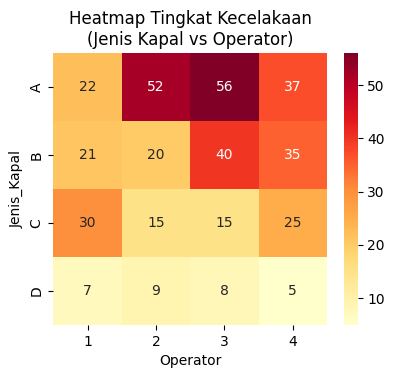

In [61]:
# Visualisasi
plt.figure(figsize=(15, 12))

# Subplot 1: Heatmap Latin Square
plt.subplot(3, 3, 1)
heatmap_data = contingency_table
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='d')
plt.title('Heatmap Tingkat Kecelakaan\n(Jenis Kapal vs Operator)')


Text(0.5, 0.98, '')

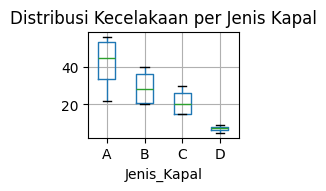

In [62]:
# Subplot 2: Box plot jenis kapal
plt.subplot(3, 3, 2)
df.boxplot(column='Tingkat_Kecelakaan', by='Jenis_Kapal', ax=plt.gca())
plt.title('Distribusi Kecelakaan per Jenis Kapal')
plt.suptitle('')

Text(0.5, 0.98, '')

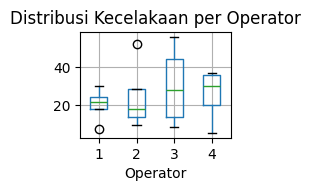

In [63]:
# Subplot 3: Box plot operator
plt.subplot(3, 3, 3)
df.boxplot(column='Tingkat_Kecelakaan', by='Operator', ax=plt.gca())
plt.title('Distribusi Kecelakaan per Operator')
plt.suptitle('')

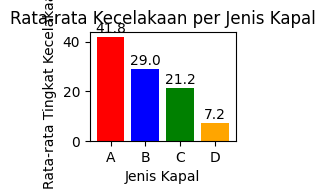

In [64]:
# Subplot 4: Bar chart rata-rata jenis kapal
plt.subplot(3, 3, 4)
kapal_means = df.groupby('Jenis_Kapal')['Tingkat_Kecelakaan'].mean()
bars1 = plt.bar(kapal_means.index, kapal_means.values, color=['red', 'blue', 'green', 'orange'])
plt.title('Rata-rata Kecelakaan per Jenis Kapal')
plt.xlabel('Jenis Kapal')
plt.ylabel('Rata-rata Tingkat Kecelakaan')
for bar, val in zip(bars1, kapal_means.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}', ha='center', va='bottom')

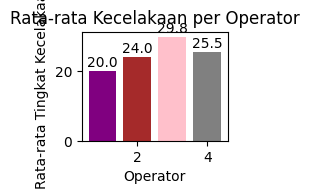

In [65]:
# Subplot 5: Bar chart rata-rata operator
plt.subplot(3, 3, 5)
operator_means = df.groupby('Operator')['Tingkat_Kecelakaan'].mean()
bars2 = plt.bar(operator_means.index, operator_means.values, color=['purple', 'brown', 'pink', 'gray'])
plt.title('Rata-rata Kecelakaan per Operator')
plt.xlabel('Operator')
plt.ylabel('Rata-rata Tingkat Kecelakaan')
for bar, val in zip(bars2, operator_means.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}', ha='center', va='bottom')

Text(0, 0.5, 'Frekuensi')

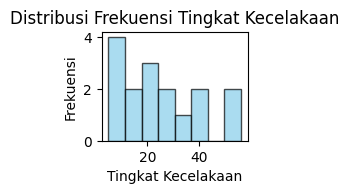

In [66]:
# Subplot 6: Histogram distribusi keseluruhan
plt.subplot(3, 3, 6)
plt.hist(df['Tingkat_Kecelakaan'], bins=8, edgecolor='black', alpha=0.7, color='skyblue')
plt.title('Distribusi Frekuensi Tingkat Kecelakaan')
plt.xlabel('Tingkat Kecelakaan')
plt.ylabel('Frekuensi')

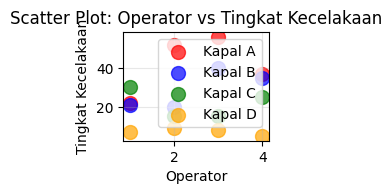

In [67]:
# Subplot 7: Scatter plot
plt.subplot(3, 3, 7)
colors = {'A': 'red', 'B': 'blue', 'C': 'green', 'D': 'orange'}
for kapal in ['A', 'B', 'C', 'D']:
    data_kapal = df[df['Jenis_Kapal'] == kapal]
    plt.scatter(data_kapal['Operator'], data_kapal['Tingkat_Kecelakaan'],
               c=colors[kapal], label=f'Kapal {kapal}', s=100, alpha=0.7)
plt.title('Scatter Plot: Operator vs Tingkat Kecelakaan')
plt.xlabel('Operator')
plt.ylabel('Tingkat Kecelakaan')
plt.legend()
plt.grid(True, alpha=0.3)

Text(0.5, 1.0, 'Proporsi Total Kecelakaan\nper Jenis Kapal')

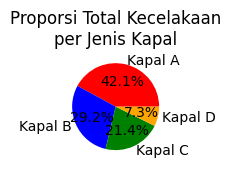

In [68]:
# Subplot 8: Pie chart total kecelakaan per jenis kapal
plt.subplot(3, 3, 8)
total_per_kapal = df.groupby('Jenis_Kapal')['Tingkat_Kecelakaan'].sum()
plt.pie(total_per_kapal.values, labels=[f'Kapal {k}' for k in total_per_kapal.index],
        autopct='%1.1f%%', colors=['red', 'blue', 'green', 'orange'])
plt.title('Proporsi Total Kecelakaan\nper Jenis Kapal')

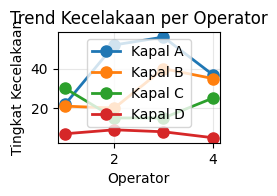

In [69]:
# Subplot 9: Line plot trend
plt.subplot(3, 3, 9)
for kapal in ['A', 'B', 'C', 'D']:
    data_kapal = df[df['Jenis_Kapal'] == kapal].sort_values('Operator')
    plt.plot(data_kapal['Operator'], data_kapal['Tingkat_Kecelakaan'],
             marker='o', label=f'Kapal {kapal}', linewidth=2, markersize=8)
plt.title('Trend Kecelakaan per Operator')
plt.xlabel('Operator')
plt.ylabel('Tingkat Kecelakaan')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**KESIMPULAN**

In [70]:
print("\n=== KESIMPULAN ANALISIS ===")
best_kapal = kapal_stats['mean'].idxmin()
worst_kapal = kapal_stats['mean'].idxmax()
best_operator = operator_stats['mean'].idxmin()
worst_operator = operator_stats['mean'].idxmax()

print(f"1. Rata-rata keseluruhan tingkat kecelakaan: {df['Tingkat_Kecelakaan'].mean():.2f}")
print(f"2. Jenis kapal TERBAIK (kecelakaan terendah): Kapal {best_kapal} dengan rata-rata {kapal_stats.loc[best_kapal, 'mean']:.2f}")
print(f"3. Jenis kapal TERBURUK (kecelakaan tertinggi): Kapal {worst_kapal} dengan rata-rata {kapal_stats.loc[worst_kapal, 'mean']:.2f}")
print(f"4. Operator TERBAIK (kecelakaan terendah): Operator {best_operator} dengan rata-rata {operator_stats.loc[best_operator, 'mean']:.2f}")
print(f"5. Operator TERBURUK (kecelakaan tertinggi): Operator {worst_operator} dengan rata-rata {operator_stats.loc[worst_operator, 'mean']:.2f}")

if p_value_kapal < 0.05:
    print("6. SIGNIFIKAN: Terdapat perbedaan yang signifikan antar jenis kapal (p < 0.05)")
else:
    print("6. TIDAK SIGNIFIKAN: Tidak ada perbedaan signifikan antar jenis kapal (p ≥ 0.05)")

if p_value_operator < 0.05:
    print("7. SIGNIFIKAN: Terdapat perbedaan yang signifikan antar operator (p < 0.05)")
else:
    print("7. TIDAK SIGNIFIKAN: Tidak ada perbedaan signifikan antar operator (p ≥ 0.05)")

print(f"8. Variabilitas data: {'Tinggi' if df['Tingkat_Kecelakaan'].std() > df['Tingkat_Kecelakaan'].mean() * 0.5 else 'Sedang' if df['Tingkat_Kecelakaan'].std() > df['Tingkat_Kecelakaan'].mean() * 0.3 else 'Rendah'}")

print("\n=== REKOMENDASI ===")
print(f"• Prioritaskan penggunaan Kapal {best_kapal} karena memiliki tingkat kecelakaan terendah")
print(f"• Berikan pelatihan tambahan untuk Operator {worst_operator} karena memiliki tingkat kecelakaan tertinggi")
print(f"• Evaluasi sistem keselamatan pada Kapal {worst_kapal}")
print("• Lakukan investigasi mendalam pada outliers yang terdeteksi")
if len(outliers) > 0:
    print("• Kasus kecelakaan ekstrem perlu ditindaklanjuti segera")


=== KESIMPULAN ANALISIS ===
1. Rata-rata keseluruhan tingkat kecelakaan: 24.81
2. Jenis kapal TERBAIK (kecelakaan terendah): Kapal D dengan rata-rata 7.25
3. Jenis kapal TERBURUK (kecelakaan tertinggi): Kapal A dengan rata-rata 41.75
4. Operator TERBAIK (kecelakaan terendah): Operator 1 dengan rata-rata 20.00
5. Operator TERBURUK (kecelakaan tertinggi): Operator 3 dengan rata-rata 29.75
6. SIGNIFIKAN: Terdapat perbedaan yang signifikan antar jenis kapal (p < 0.05)
7. TIDAK SIGNIFIKAN: Tidak ada perbedaan signifikan antar operator (p ≥ 0.05)
8. Variabilitas data: Tinggi

=== REKOMENDASI ===
• Prioritaskan penggunaan Kapal D karena memiliki tingkat kecelakaan terendah
• Berikan pelatihan tambahan untuk Operator 3 karena memiliki tingkat kecelakaan tertinggi
• Evaluasi sistem keselamatan pada Kapal A
• Lakukan investigasi mendalam pada outliers yang terdeteksi


Berdasarkan hasil analisis terhadap data tingkat kecelakaan kapal, diketahui bahwa rata-rata keseluruhan tingkat kecelakaan adalah sebesar 24,81. Jenis kapal dengan performa keselamatan terbaik adalah Kapal D, yang mencatatkan rata-rata kecelakaan terendah yaitu 7,25. Sebaliknya, Kapal A menunjukkan performa keselamatan terburuk dengan rata-rata kecelakaan tertinggi sebesar 41,75. Dari sisi operator, Operator 1 memiliki performa terbaik dengan rata-rata kecelakaan 20,00, sedangkan Operator 3 merupakan yang terburuk dengan rata-rata kecelakaan mencapai 29,75. Hasil uji statistik menunjukkan bahwa terdapat perbedaan yang signifikan antar jenis kapal, yang berarti jenis kapal berpengaruh nyata terhadap tingkat kecelakaan. Namun, tidak ditemukan perbedaan yang signifikan antar operator, sehingga perbedaan performa antar operator belum cukup kuat secara statistik. Variabilitas data secara umum tergolong tinggi, menunjukkan bahwa sebaran tingkat kecelakaan cukup besar dan perlu mendapat perhatian dalam evaluasi lebih lanjut.

# **SOAL NOMER 4: Analisis Vernalisasi Tanaman dengan GA3**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway
from sklearn.impute import SimpleImputer
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [72]:
# Data vernalisasi dengan GA3 (missing values ditandai dengan NaN)
data_matrix = np.array([
    [40, 46, np.nan, 44],
    [43, np.nan, 33, 45],
    [np.nan, 39, 39, 36],
    [31, 42, 44, np.nan]
])


In [73]:
# Membuat dataset terstruktur
rows = []
lama_vernalisasi = [0, 14, 28, 42]
konsentrasi_ga3 = [0, 500, 1000, 1500]

for i in range(4):
    for j in range(4):
        if not np.isnan(data_matrix[i, j]):
            rows.append({
                'Lama_Vernalisasi': lama_vernalisasi[i],
                'Konsentrasi_GA3': konsentrasi_ga3[j],
                'Blok': i + 1,
                'Perlakuan': j + 1,
                'Umur_Berbunga': data_matrix[i, j]
            })

df = pd.DataFrame(rows)

**ANALISIS VERNALISASI TANAMAN DENGAN GA3**

In [74]:

print("=== ANALISIS VERNALISASI TANAMAN DENGAN GA3 ===")
print("=== RANCANGAN BLOK RANDI TAK LENGKAP SEIMBANG (RBRTLS) ===")
print("\nDATA OBSERVASI (dengan missing values):")
print("Struktur data asli:")
print("Lama Vernalisasi (hari) vs Konsentrasi GA3 (ppm)")
print("     0    500   1000  1500")
for i, lama in enumerate(lama_vernalisasi):
    row_str = f"{lama:2d}  "
    for j in range(4):
        if np.isnan(data_matrix[i, j]):
            row_str += "  -   "
        else:
            row_str += f"{data_matrix[i, j]:4.0f}  "
    print(row_str)

print(f"\nJumlah observasi tersedia: {len(df)} dari 16 kemungkinan")
print(f"Missing values: {16 - len(df)}")

=== ANALISIS VERNALISASI TANAMAN DENGAN GA3 ===
=== RANCANGAN BLOK RANDI TAK LENGKAP SEIMBANG (RBRTLS) ===

DATA OBSERVASI (dengan missing values):
Struktur data asli:
Lama Vernalisasi (hari) vs Konsentrasi GA3 (ppm)
     0    500   1000  1500
 0    40    46    -     44  
14    43    -     33    45  
28    -     39    39    36  
42    31    42    44    -   

Jumlah observasi tersedia: 12 dari 16 kemungkinan
Missing values: 4


In [76]:
print("\nDATA TERSTRUKTUR:")
print(df)


DATA TERSTRUKTUR:
    Lama_Vernalisasi  Konsentrasi_GA3  Blok  Perlakuan  Umur_Berbunga
0                  0                0     1          1           40.0
1                  0              500     1          2           46.0
2                  0             1500     1          4           44.0
3                 14                0     2          1           43.0
4                 14             1000     2          3           33.0
5                 14             1500     2          4           45.0
6                 28              500     3          2           39.0
7                 28             1000     3          3           39.0
8                 28             1500     3          4           36.0
9                 42                0     4          1           31.0
10                42              500     4          2           42.0
11                42             1000     4          3           44.0


**STATISTIK DESKRIPTIF KESELURUHAN**

In [75]:
print("\nSTATISTIK DESKRIPTIF KESELURUHAN:")
print(f"Rata-rata umur berbunga: {df['Umur_Berbunga'].mean():.2f} hari")
print(f"Median: {df['Umur_Berbunga'].median():.2f} hari")
print(f"Standar deviasi: {df['Umur_Berbunga'].std():.2f}")
print(f"Variance: {df['Umur_Berbunga'].var():.2f}")
print(f"Minimum: {df['Umur_Berbunga'].min():.0f} hari")
print(f"Maksimum: {df['Umur_Berbunga'].max():.0f} hari")
print(f"Range: {df['Umur_Berbunga'].max() - df['Umur_Berbunga'].min():.0f} hari")


STATISTIK DESKRIPTIF KESELURUHAN:
Rata-rata umur berbunga: 40.17 hari
Median: 41.00 hari
Standar deviasi: 4.80
Variance: 23.06
Minimum: 31 hari
Maksimum: 46 hari
Range: 15 hari


**STATISTIK BERDASARKAN LAMA VERNALISASI**

In [77]:
print("\nSTATISTIK BERDASARKAN LAMA VERNALISASI:")
vernalisasi_stats = df.groupby('Lama_Vernalisasi')['Umur_Berbunga'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
print(vernalisasi_stats)


STATISTIK BERDASARKAN LAMA VERNALISASI:
                  count   mean   std   min   max
Lama_Vernalisasi                                
0                     3  43.33  3.06  40.0  46.0
14                    3  40.33  6.43  33.0  45.0
28                    3  38.00  1.73  36.0  39.0
42                    3  39.00  7.00  31.0  44.0


**STATISTIK BERDASARKAN KONSENTRASI GA3**

In [78]:
print("\nSTATISTIK BERDASARKAN KONSENTRASI GA3:")
ga3_stats = df.groupby('Konsentrasi_GA3')['Umur_Berbunga'].agg(['count', 'mean', 'std', 'min', 'max']).round(2)
print(ga3_stats)


STATISTIK BERDASARKAN KONSENTRASI GA3:
                 count   mean   std   min   max
Konsentrasi_GA3                                
0                    3  38.00  6.24  31.0  43.0
500                  3  42.33  3.51  39.0  46.0
1000                 3  38.67  5.51  33.0  44.0
1500                 3  41.67  4.93  36.0  45.0


**ANALISIS VARIANS (ANOVA) - LAMA VERNALISASI**

In [79]:
print("\nANALISIS VARIANS (ANOVA) - LAMA VERNALISASI:")
try:
    groups_vernalisasi = [df[df['Lama_Vernalisasi'] == lama]['Umur_Berbunga'].values
                         for lama in df['Lama_Vernalisasi'].unique()]
    # Filter groups yang memiliki lebih dari 1 observasi
    groups_vernalisasi = [group for group in groups_vernalisasi if len(group) > 1]

    if len(groups_vernalisasi) >= 2:
        f_stat_vern, p_value_vern = f_oneway(*groups_vernalisasi)
        print(f"F-statistic: {f_stat_vern:.4f}")
        print(f"P-value: {p_value_vern:.4f}")
        print(f"Signifikan (α=0.05): {'Ya' if p_value_vern < 0.05 else 'Tidak'}")
    else:
        print("Tidak cukup data untuk ANOVA vernalisasi")
        f_stat_vern, p_value_vern = 0, 1
except:
    print("Error dalam ANOVA vernalisasi")
    f_stat_vern, p_value_vern = 0, 1


ANALISIS VARIANS (ANOVA) - LAMA VERNALISASI:
F-statistic: 0.6277
P-value: 0.6172
Signifikan (α=0.05): Tidak


**ANALISIS VARIANS (ANOVA) - KONSENTRASI GA3**

In [80]:
print("\nANALISIS VARIANS (ANOVA) - KONSENTRASI GA3:")
try:
    groups_ga3 = [df[df['Konsentrasi_GA3'] == konsen]['Umur_Berbunga'].values
                  for konsen in df['Konsentrasi_GA3'].unique()]
    # Filter groups yang memiliki lebih dari 1 observasi
    groups_ga3 = [group for group in groups_ga3 if len(group) > 1]

    if len(groups_ga3) >= 2:
        f_stat_ga3, p_value_ga3 = f_oneway(*groups_ga3)
        print(f"F-statistic: {f_stat_ga3:.4f}")
        print(f"P-value: {p_value_ga3:.4f}")
        print(f"Signifikan (α=0.05): {'Ya' if p_value_ga3 < 0.05 else 'Tidak'}")
    else:
        print("Tidak cukup data untuk ANOVA GA3")
        f_stat_ga3, p_value_ga3 = 0, 1
except:
    print("Error dalam ANOVA GA3")
    f_stat_ga3, p_value_ga3 = 0, 1


ANALISIS VARIANS (ANOVA) - KONSENTRASI GA3:
F-statistic: 0.5241
P-value: 0.6778
Signifikan (α=0.05): Tidak


**ANALISIS KORELASI**

In [81]:
print("\nANALISIS KORELASI:")
correlation_matrix = df[['Lama_Vernalisasi', 'Konsentrasi_GA3', 'Umur_Berbunga']].corr()
print(correlation_matrix.round(3))


ANALISIS KORELASI:
                  Lama_Vernalisasi  Konsentrasi_GA3  Umur_Berbunga
Lama_Vernalisasi             1.000           -0.067         -0.373
Konsentrasi_GA3             -0.067            1.000          0.178
Umur_Berbunga               -0.373            0.178          1.000


**ANALISIS REGRESI SEDERHANA**

In [82]:
print("\nANALISIS REGRESI SEDERHANA:")
print("\nRegresi: Umur Berbunga vs Lama Vernalisasi")
from scipy.stats import linregress
slope_vern, intercept_vern, r_value_vern, p_value_reg_vern, std_err_vern = linregress(
    df['Lama_Vernalisasi'], df['Umur_Berbunga'])
print(f"Persamaan: y = {intercept_vern:.2f} + {slope_vern:.4f}x")
print(f"R-squared: {r_value_vern**2:.4f}")
print(f"P-value: {p_value_reg_vern:.4f}")

print("\nRegresi: Umur Berbunga vs Konsentrasi GA3")
slope_ga3, intercept_ga3, r_value_ga3, p_value_reg_ga3, std_err_ga3 = linregress(
    df['Konsentrasi_GA3'], df['Umur_Berbunga'])
print(f"Persamaan: y = {intercept_ga3:.2f} + {slope_ga3:.6f}x")
print(f"R-squared: {r_value_ga3**2:.4f}")
print(f"P-value: {p_value_reg_ga3:.4f}")


ANALISIS REGRESI SEDERHANA:

Regresi: Umur Berbunga vs Lama Vernalisasi
Persamaan: y = 42.47 + -0.1095x
R-squared: 0.1390
P-value: 0.2326

Regresi: Umur Berbunga vs Konsentrasi GA3
Persamaan: y = 39.07 + 0.001467x
R-squared: 0.0318
P-value: 0.5792


**ESTIMASI MISSING VALUES**

In [83]:
print("\nESTIMASI MISSING VALUES:")
# Menggunakan rata-rata baris dan kolom untuk estimasi
print("Estimasi berdasarkan rata-rata baris dan kolom:")
for i in range(4):
    for j in range(4):
        if np.isnan(data_matrix[i, j]):
            # Rata-rata baris (tidak termasuk NaN)
            row_mean = np.nanmean(data_matrix[i, :])
            # Rata-rata kolom (tidak termasuk NaN)
            col_mean = np.nanmean(data_matrix[:, j])
            # Estimasi sebagai rata-rata dari rata-rata baris dan kolom
            estimated_value = (row_mean + col_mean) / 2
            print(f"Vernalisasi {lama_vernalisasi[i]} hari, GA3 {konsentrasi_ga3[j]} ppm: {estimated_value:.1f}")


ESTIMASI MISSING VALUES:
Estimasi berdasarkan rata-rata baris dan kolom:
Vernalisasi 0 hari, GA3 1000 ppm: 41.0
Vernalisasi 14 hari, GA3 500 ppm: 41.3
Vernalisasi 28 hari, GA3 0 ppm: 38.0
Vernalisasi 42 hari, GA3 1500 ppm: 40.3


**DETEKSI OUTLIERS (Metode IQR)**

In [84]:
print("\nDETEKSI OUTLIERS (Metode IQR):")
Q1 = df['Umur_Berbunga'].quantile(0.25)
Q3 = df['Umur_Berbunga'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Umur_Berbunga'] < lower_bound) | (df['Umur_Berbunga'] > upper_bound)]
print(f"Batas bawah: {lower_bound:.2f}")
print(f"Batas atas: {upper_bound:.2f}")
if len(outliers) > 0:
    print("Outliers ditemukan:")
    print(outliers[['Lama_Vernalisasi', 'Konsentrasi_GA3', 'Umur_Berbunga']])
else:
    print("Tidak ada outliers terdeteksi")


DETEKSI OUTLIERS (Metode IQR):
Batas bawah: 29.62
Batas atas: 52.62
Tidak ada outliers terdeteksi


**EFISIENSI DESAIN RBRTLS**

In [85]:
print("\nEFISIENSI DESAIN RBRTLS:")
# Menghitung efisiensi relatif
k = 4  # jumlah perlakuan
r = 3  # rata-rata replikasi per perlakuan
b = 4  # jumlah blok
lambda_val = (r * (k-1)) / (b-1) if b > 1 else 0  # parameter lambda
efficiency = (k * lambda_val) / (r * (k-1)) if r * (k-1) > 0 else 0

print(f"Jumlah perlakuan (k): {k}")
print(f"Rata-rata replikasi (r): {len(df)/k:.1f}")
print(f"Jumlah blok (b): {b}")
print(f"Parameter λ: {lambda_val:.2f}")
print(f"Efisiensi relatif: {efficiency:.2%}")


EFISIENSI DESAIN RBRTLS:
Jumlah perlakuan (k): 4
Rata-rata replikasi (r): 3.0
Jumlah blok (b): 4
Parameter λ: 3.00
Efisiensi relatif: 133.33%


**VISUALISASI**

Text(170.72222222222223, 0.5, 'Lama Vernalisasi (hari)')

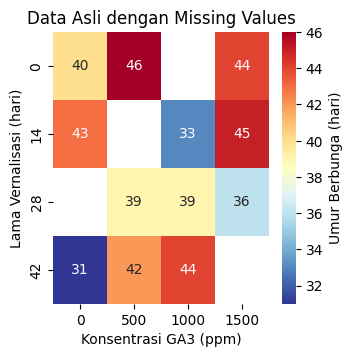

In [86]:
# Visualisasi
plt.figure(figsize=(16, 12))

# Subplot 1: Heatmap data asli
plt.subplot(3, 4, 1)
heatmap_data = data_matrix.copy()
mask = np.isnan(heatmap_data)
sns.heatmap(heatmap_data, annot=True, fmt='.0f', cmap='RdYlBu_r',
            xticklabels=konsentrasi_ga3, yticklabels=lama_vernalisasi,
            mask=mask, cbar_kws={'label': 'Umur Berbunga (hari)'})
plt.title('Data Asli dengan Missing Values')
plt.xlabel('Konsentrasi GA3 (ppm)')
plt.ylabel('Lama Vernalisasi (hari)')

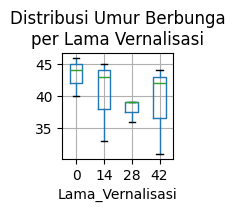

In [87]:
# Subplot 2: Box plot vernalisasi
plt.subplot(3, 4, 2)
if len(df['Lama_Vernalisasi'].unique()) > 1:
    df.boxplot(column='Umur_Berbunga', by='Lama_Vernalisasi', ax=plt.gca())
    plt.title('Distribusi Umur Berbunga\nper Lama Vernalisasi')
    plt.suptitle('')
else:
    plt.text(0.5, 0.5, 'Insufficient data\nfor boxplot', ha='center', va='center')
    plt.title('Box Plot Vernalisasi')

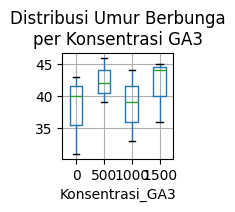

In [88]:
# Subplot 3: Box plot GA3
plt.subplot(3, 4, 3)
if len(df['Konsentrasi_GA3'].unique()) > 1:
    df.boxplot(column='Umur_Berbunga', by='Konsentrasi_GA3', ax=plt.gca())
    plt.title('Distribusi Umur Berbunga\nper Konsentrasi GA3')
    plt.suptitle('')
else:
    plt.text(0.5, 0.5, 'Insufficient data\nfor boxplot', ha='center', va='center')
    plt.title('Box Plot GA3')

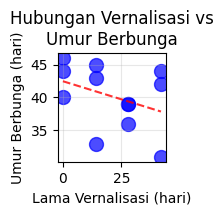

In [89]:
# Subplot 4: Scatter plot vernalisasi
plt.subplot(3, 4, 4)
plt.scatter(df['Lama_Vernalisasi'], df['Umur_Berbunga'], alpha=0.7, s=100, color='blue')
z = np.polyfit(df['Lama_Vernalisasi'], df['Umur_Berbunga'], 1)
p = np.poly1d(z)
plt.plot(df['Lama_Vernalisasi'], p(df['Lama_Vernalisasi']), "r--", alpha=0.8)
plt.title('Hubungan Vernalisasi vs\nUmur Berbunga')
plt.xlabel('Lama Vernalisasi (hari)')
plt.ylabel('Umur Berbunga (hari)')
plt.grid(True, alpha=0.3)


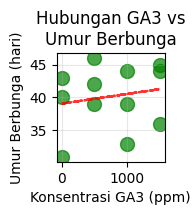

In [90]:
# Subplot 5: Scatter plot GA3
plt.subplot(3, 4, 5)
plt.scatter(df['Konsentrasi_GA3'], df['Umur_Berbunga'], alpha=0.7, s=100, color='green')
z2 = np.polyfit(df['Konsentrasi_GA3'], df['Umur_Berbunga'], 1)
p2 = np.poly1d(z2)
plt.plot(df['Konsentrasi_GA3'], p2(df['Konsentrasi_GA3']), "r--", alpha=0.8)
plt.title('Hubungan GA3 vs\nUmur Berbunga')
plt.xlabel('Konsentrasi GA3 (ppm)')
plt.ylabel('Umur Berbunga (hari)')
plt.grid(True, alpha=0.3)

Text(0, 0.5, 'Frekuensi')

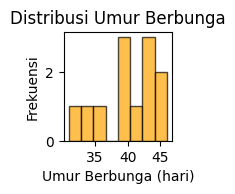

In [91]:
# Subplot 6: Histogram
plt.subplot(3, 4, 6)
plt.hist(df['Umur_Berbunga'], bins=8, edgecolor='black', alpha=0.7, color='orange')
plt.title('Distribusi Umur Berbunga')
plt.xlabel('Umur Berbunga (hari)')
plt.ylabel('Frekuensi')

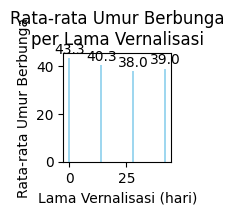

In [92]:
# Subplot 7: Bar plot rata-rata vernalisasi
plt.subplot(3, 4, 7)
vern_means = df.groupby('Lama_Vernalisasi')['Umur_Berbunga'].mean()
bars1 = plt.bar(vern_means.index, vern_means.values, color='skyblue', alpha=0.8)
plt.title('Rata-rata Umur Berbunga\nper Lama Vernalisasi')
plt.xlabel('Lama Vernalisasi (hari)')
plt.ylabel('Rata-rata Umur Berbunga')
for bar, val in zip(bars1, vern_means.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}', ha='center', va='bottom')

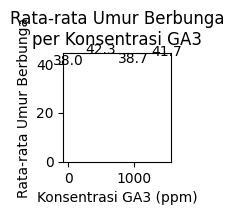

In [93]:
# Subplot 8: Bar plot rata-rata GA3
plt.subplot(3, 4, 8)
ga3_means = df.groupby('Konsentrasi_GA3')['Umur_Berbunga'].mean()
bars2 = plt.bar(ga3_means.index, ga3_means.values, color='lightgreen', alpha=0.8)
plt.title('Rata-rata Umur Berbunga\nper Konsentrasi GA3')
plt.xlabel('Konsentrasi GA3 (ppm)')
plt.ylabel('Rata-rata Umur Berbunga')
for bar, val in zip(bars2, ga3_means.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
             f'{val:.1f}', ha='center', va='bottom')

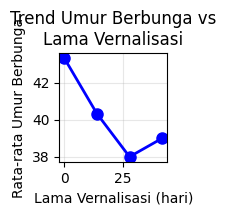

In [94]:
# Subplot 9: Line plot trend vernalisasi
plt.subplot(3, 4, 9)
vern_sorted = vern_means.sort_index()
plt.plot(vern_sorted.index, vern_sorted.values, marker='o', linewidth=2, markersize=8, color='blue')
plt.title('Trend Umur Berbunga vs\nLama Vernalisasi')
plt.xlabel('Lama Vernalisasi (hari)')
plt.ylabel('Rata-rata Umur Berbunga')
plt.grid(True, alpha=0.3)

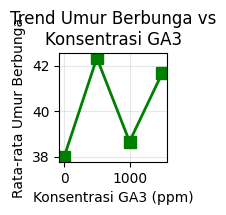

In [95]:
# Subplot 10: Line plot trend GA3
plt.subplot(3, 4, 10)
ga3_sorted = ga3_means.sort_index()
plt.plot(ga3_sorted.index, ga3_sorted.values, marker='s', linewidth=2, markersize=8, color='green')
plt.title('Trend Umur Berbunga vs\nKonsentrasi GA3')
plt.xlabel('Konsentrasi GA3 (ppm)')
plt.ylabel('Rata-rata Umur Berbunga')
plt.grid(True, alpha=0.3)

Text(0, 0.5, 'Konsentrasi GA3 (ppm)')

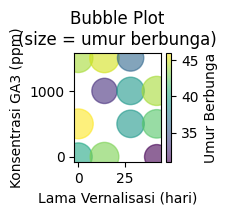

In [96]:
# Subplot 11: 3D scatter (simulasi)
plt.subplot(3, 4, 11)
plt.scatter(df['Lama_Vernalisasi'], df['Konsentrasi_GA3'],
           s=df['Umur_Berbunga']*10, alpha=0.6, c=df['Umur_Berbunga'], cmap='viridis')
plt.colorbar(label='Umur Berbunga')
plt.title('Bubble Plot\n(size = umur berbunga)')
plt.xlabel('Lama Vernalisasi (hari)')
plt.ylabel('Konsentrasi GA3 (ppm)')

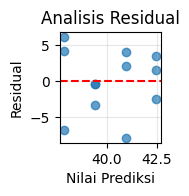

In [97]:
# Subplot 12: Residual analysis
plt.subplot(3, 4, 12)
predicted_vern = intercept_vern + slope_vern * df['Lama_Vernalisasi']
residuals = df['Umur_Berbunga'] - predicted_vern
plt.scatter(predicted_vern, residuals, alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Analisis Residual')
plt.xlabel('Nilai Prediksi')
plt.ylabel('Residual')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**KESIMPULAN**

In [98]:
print("\n=== KESIMPULAN ANALISIS ===")
best_vern = vern_means.idxmin() if len(vern_means) > 0 else "Tidak tersedia"
best_ga3 = ga3_means.idxmin() if len(ga3_means) > 0 else "Tidak tersedia"

print(f"1. Rata-rata umur berbunga keseluruhan: {df['Umur_Berbunga'].mean():.2f} hari")
print(f"2. Lama vernalisasi terbaik (umur berbunga tercepat): {best_vern} hari dengan rata-rata {vern_means.min():.2f} hari" if len(vern_means) > 0 else "2. Data vernalisasi tidak cukup")
print(f"3. Konsentrasi GA3 terbaik (umur berbunga tercepat): {best_ga3} ppm dengan rata-rata {ga3_means.min():.2f} hari" if len(ga3_means) > 0 else "3. Data GA3 tidak cukup")

if 'p_value_vern' in locals() and p_value_vern < 0.05:
    print("4. SIGNIFIKAN: Lama vernalisasi berpengaruh signifikan terhadap umur berbunga")
else:
    print("4. TIDAK SIGNIFIKAN: Lama vernalisasi tidak berpengaruh signifikan terhadap umur berbunga")

if 'p_value_ga3' in locals() and p_value_ga3 < 0.05:
    print("5. SIGNIFIKAN: Konsentrasi GA3 berpengaruh signifikan terhadap umur berbunga")
else:
    print("5. TIDAK SIGNIFIKAN: Konsentrasi GA3 tidak berpengaruh signifikan terhadap umur berbunga")

print(f"6. Korelasi vernalisasi-umur berbunga: {correlation_matrix.loc['Lama_Vernalisasi', 'Umur_Berbunga']:.3f}")
print(f"7. Korelasi GA3-umur berbunga: {correlation_matrix.loc['Konsentrasi_GA3', 'Umur_Berbunga']:.3f}")

print("\n=== REKOMENDASI BERDASARKAN ANALISIS ===")
if len(vern_means) > 0:
    print(f"• Gunakan lama vernalisasi {best_vern} hari untuk mempercepat pembungaan")
if len(ga3_means) > 0:
    print(f"• Gunakan konsentrasi GA3 {best_ga3} ppm untuk hasil optimal")
print("• Pertimbangkan kombinasi perlakuan yang memberikan umur berbunga terendah")
print("• Lakukan percobaan tambahan untuk mengisi missing values")
print("• Evaluasi efisiensi desain RBRTLS dengan data lengkap")

print(f"\n=== EVALUASI DESAIN PERCOBAAN ===")
print(f"• Efisiensi desain RBRTLS: {efficiency:.1%}")
print(f"• Jumlah data tersedia: {len(df)}/16 ({len(df)/16*100:.1f}%)")
print("• Desain ini cocok untuk kondisi dimana tidak semua kombinasi perlakuan dapat diuji")
print("• Missing values dapat diestimasi menggunakan analisis residual atau metode imputasi")


=== KESIMPULAN ANALISIS ===
1. Rata-rata umur berbunga keseluruhan: 40.17 hari
2. Lama vernalisasi terbaik (umur berbunga tercepat): 28 hari dengan rata-rata 38.00 hari
3. Konsentrasi GA3 terbaik (umur berbunga tercepat): 0 ppm dengan rata-rata 38.00 hari
4. TIDAK SIGNIFIKAN: Lama vernalisasi tidak berpengaruh signifikan terhadap umur berbunga
5. TIDAK SIGNIFIKAN: Konsentrasi GA3 tidak berpengaruh signifikan terhadap umur berbunga
6. Korelasi vernalisasi-umur berbunga: -0.373
7. Korelasi GA3-umur berbunga: 0.178

=== REKOMENDASI BERDASARKAN ANALISIS ===
• Gunakan lama vernalisasi 28 hari untuk mempercepat pembungaan
• Gunakan konsentrasi GA3 0 ppm untuk hasil optimal
• Pertimbangkan kombinasi perlakuan yang memberikan umur berbunga terendah
• Lakukan percobaan tambahan untuk mengisi missing values
• Evaluasi efisiensi desain RBRTLS dengan data lengkap

=== EVALUASI DESAIN PERCOBAAN ===
• Efisiensi desain RBRTLS: 133.3%
• Jumlah data tersedia: 12/16 (75.0%)
• Desain ini cocok untuk kon

Berdasarkan hasil analisis, diketahui bahwa rata-rata umur berbunga secara keseluruhan adalah 40,17 hari. Perlakuan dengan lama vernalisasi 28 hari dan konsentrasi GA3 sebesar 0 ppm menunjukkan hasil terbaik dengan rata-rata umur berbunga tercepat, yaitu masing-masing sebesar 38,00 hari. Namun demikian, hasil uji statistik menunjukkan bahwa tidak terdapat pengaruh yang signifikan baik dari perlakuan lama vernalisasi maupun dari konsentrasi GA3 terhadap umur berbunga. Korelasi antara lama vernalisasi dan umur berbunga bersifat negatif sedang sebesar -0,373, menunjukkan kecenderungan bahwa semakin lama perlakuan vernalisasi, umur berbunga cenderung lebih singkat. Sebaliknya, korelasi antara konsentrasi GA3 dan umur berbunga cukup lemah, yaitu sebesar 0,178.

Berdasarkan temuan tersebut, disarankan untuk menggunakan perlakuan vernalisasi selama 28 hari dan konsentrasi GA3 0 ppm guna memperoleh umur berbunga yang lebih cepat. Kombinasi perlakuan dengan hasil terbaik juga perlu diperhatikan lebih lanjut. Selain itu, karena data yang tersedia hanya 75% dari total rencana (12 dari 16 kombinasi perlakuan), disarankan untuk melakukan percobaan tambahan guna melengkapi data yang hilang, serta mengevaluasi kembali desain percobaan dengan mempertimbangkan metode imputasi atau analisis residual. Efisiensi desain RBRTLS pada percobaan ini mencapai 133,3%, yang menunjukkan bahwa desain ini tetap efektif digunakan dalam kondisi di mana tidak semua kombinasi perlakuan dapat diobservasi secara langsung.